In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url='https://raw.githubusercontent.com/WaTheDarknest/CSI/main/Dataset/Time/2ESP32Dataset(60Sec).csv'
# อ่านข้อมูลไฟล์ csv จาก url
df=pd.read_csv(url)
# เเสดง 10 ตัวอย่างเเรก
df.head(10)

,Timestamp,TXSpot,R1,I1,R2,I2,R3,I3,R4,I4,...,R60,I60,R61,I61,R62,I62,R63,I63,R64,I64
0,0.418851,1,28,-64,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.425698,1,-99,-48,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.444691,1,-121,112,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.455975,1,-122,-31,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.479874,1,-122,-31,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.504687,1,82,-96,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.958187,1,82,-96,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.151100,1,82,-96,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.459740,1,82,-96,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1.922480,1,82,-96,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# เเสดง 10 ตัวอย่างสุดท้าย
df.tail(10)

,Timestamp,TXSpot,R1,I1,R2,I2,R3,I3,R4,I4,...,R60,I60,R61,I61,R62,I62,R63,I63,R64,I64
17226,59.9164,3,84,-64,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17227,59.9227,3,84,-64,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17228,59.9281,3,84,-64,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17229,59.9366,3,84,-64,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17230,59.9428,3,84,-64,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17231,59.9567,3,84,-64,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17232,59.9712,3,84,-64,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17233,59.9774,3,84,-64,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17234,59.9839,3,84,-64,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17235,59.9930,3,84,-64,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


สร้างการเรียนรู้เเบบ Decision tree

In [4]:
# นำเข้าคลาสของ tree เเละ train_test_split จาก scikit learn โดย
from sklearn.model_selection import train_test_split
from sklearn import tree

กำหนดคุณลักษณะในการเรียนรู้ เเละ คุณลักษณะของผลลัพธ์ จากนั้นทำการเเบ่งข้อมูลสำหรับการเรียนรู้เเละทดสอบ

In [5]:
feature_cols=['R1', 'I1', 'R2', 'I2', 'R7', 'I7', 'R8', 'I8', 'R9', 'I9', 'R10', 'I10', 'R11', 'I11', 'R12', 'I12', 'R13', 'I13', 'R14', 'I14', 'R15', 'I15', 'R16', 'I16'
       , 'R17', 'I17', 'R18', 'I18', 'R19', 'I19', 'R20', 'I20', 'R21', 'I21', 'R22', 'I22', 'R23', 'I23', 'R24', 'I24', 'R25', 'I25', 'R26', 'I26', 'R27', 'I27'
       , 'R28', 'I28', 'R29', 'I29', 'R30', 'I30', 'R31', 'I31', 'R32', 'I32', 'R33', 'I33', 'R34', 'I34', 'R35', 'I35', 'R36', 'I36', 'R37', 'I37', 'R38', 'I38'
       , 'R39', 'I39', 'R40', 'I40', 'R41', 'I41', 'R42', 'I42', 'R43', 'I43', 'R44', 'I44', 'R45', 'I45', 'R46', 'I46', 'R47', 'I47', 'R48', 'I48', 'R49', 'I49'
       , 'R50', 'I50', 'R51', 'I51', 'R52', 'I52', 'R53', 'I53', 'R54', 'I54', 'R55', 'I55', 'R56', 'I56', 'R57', 'I57', 'R58', 'I58', 'R59', 'I59']
target_col='TXSpot'
X=df[feature_cols]
y=df[target_col]

test_size=0.01
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=test_size, random_state=7)

สร้างแบบจำลอง Decision tree

In [6]:
# default ของ sklearn จะพิจารณาการสร้างเเผนภาพต้นไม้ด้วย Gini index
# โดยสามารถเลือกเกณฑ์การพิจารณาด้วยการกำหนดพารามิเตอร์ criterion
model = tree.DecisionTreeClassifier()

เเสดงพารามิเตอร์สำหรับการสร้างแบบจำลอง decision tree

In [7]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

ทดลองกำหนดค่าพารามิเตอร์ โดยกำหนดให้เกณฑ์การพิจารณาโดยใช้ gini index เเละกำหนดขนาดจำนวนการเเตกเเผนภาพได้ดังนี้

In [8]:
params={'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
#  'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}
model=tree.DecisionTreeClassifier(**params)

สร้างแบบจำลอง

In [9]:
model = model.fit(X_train, y_train)

In [10]:
model

DecisionTreeClassifier(max_depth=3)

ทดลองเเสดงค่าความสำคัญของเเต่ละคุณลักษณะโดย

In [11]:
# print('column_name',X_train.columns)
# model.feature_importances_
fs = pd.Series(model.feature_importances_, index=X_train.columns.sort_values(ascending=True))
fs

I1     0.000000
I10    0.000000
I11    0.000000
I12    0.000000
I13    0.000000
         ...   
R58    0.000000
R59    0.000000
R7     0.163196
R8     0.000000
R9     0.194945
Length: 110, dtype: float64

ทดลองดูค่าผิดพลาดของแบบจำลองที่สร้างขึ้นโดยใช้ค่า R2

In [12]:
model.score(X_train, y_train)

0.8025552364765868

In [13]:
model.score(X_test, y_test)

0.7803468208092486

In [14]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': 3,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['R1', 'I1', 'R2', 'I2', 'R7', 'I7', 'R8', 'I8', 'R9', 'I9', 'R10',
        'I10', 'R11', 'I11', 'R12', 'I12', 'R13', 'I13', 'R14', 'I14',
        'R15', 'I15', 'R16', 'I16', 'R17', 'I17', 'R18', 'I18', 'R19',
        'I19', 'R20', 'I20', 'R21', 'I21', 'R22', 'I22', 'R23', 'I23',
        'R24', 'I24', 'R25', 'I25', 'R26', 'I26', 'R27', 'I27', 'R28',
        'I28', 'R29', 'I29', 'R30', 'I30', 'R31', 'I31', 'R32', 'I32',
        'R33', 'I33', 'R34', 'I34', 'R35', 'I35', 'R36', 'I36', 'R37',
        'I37', 'R38', 'I38', 'R39', 'I39', 'R40', 'I40', 'R41', 'I41',
        'R42', 'I42', 'R43', 'I43', 'R44', 'I44', 'R45', 'I45', 'R46',
        'I46', 'R47', 'I47', 'R48', 'I48', 'R49',

ทดลองเเสดงเเผนภาพของ Decision tree ที่สร้างขึ้น

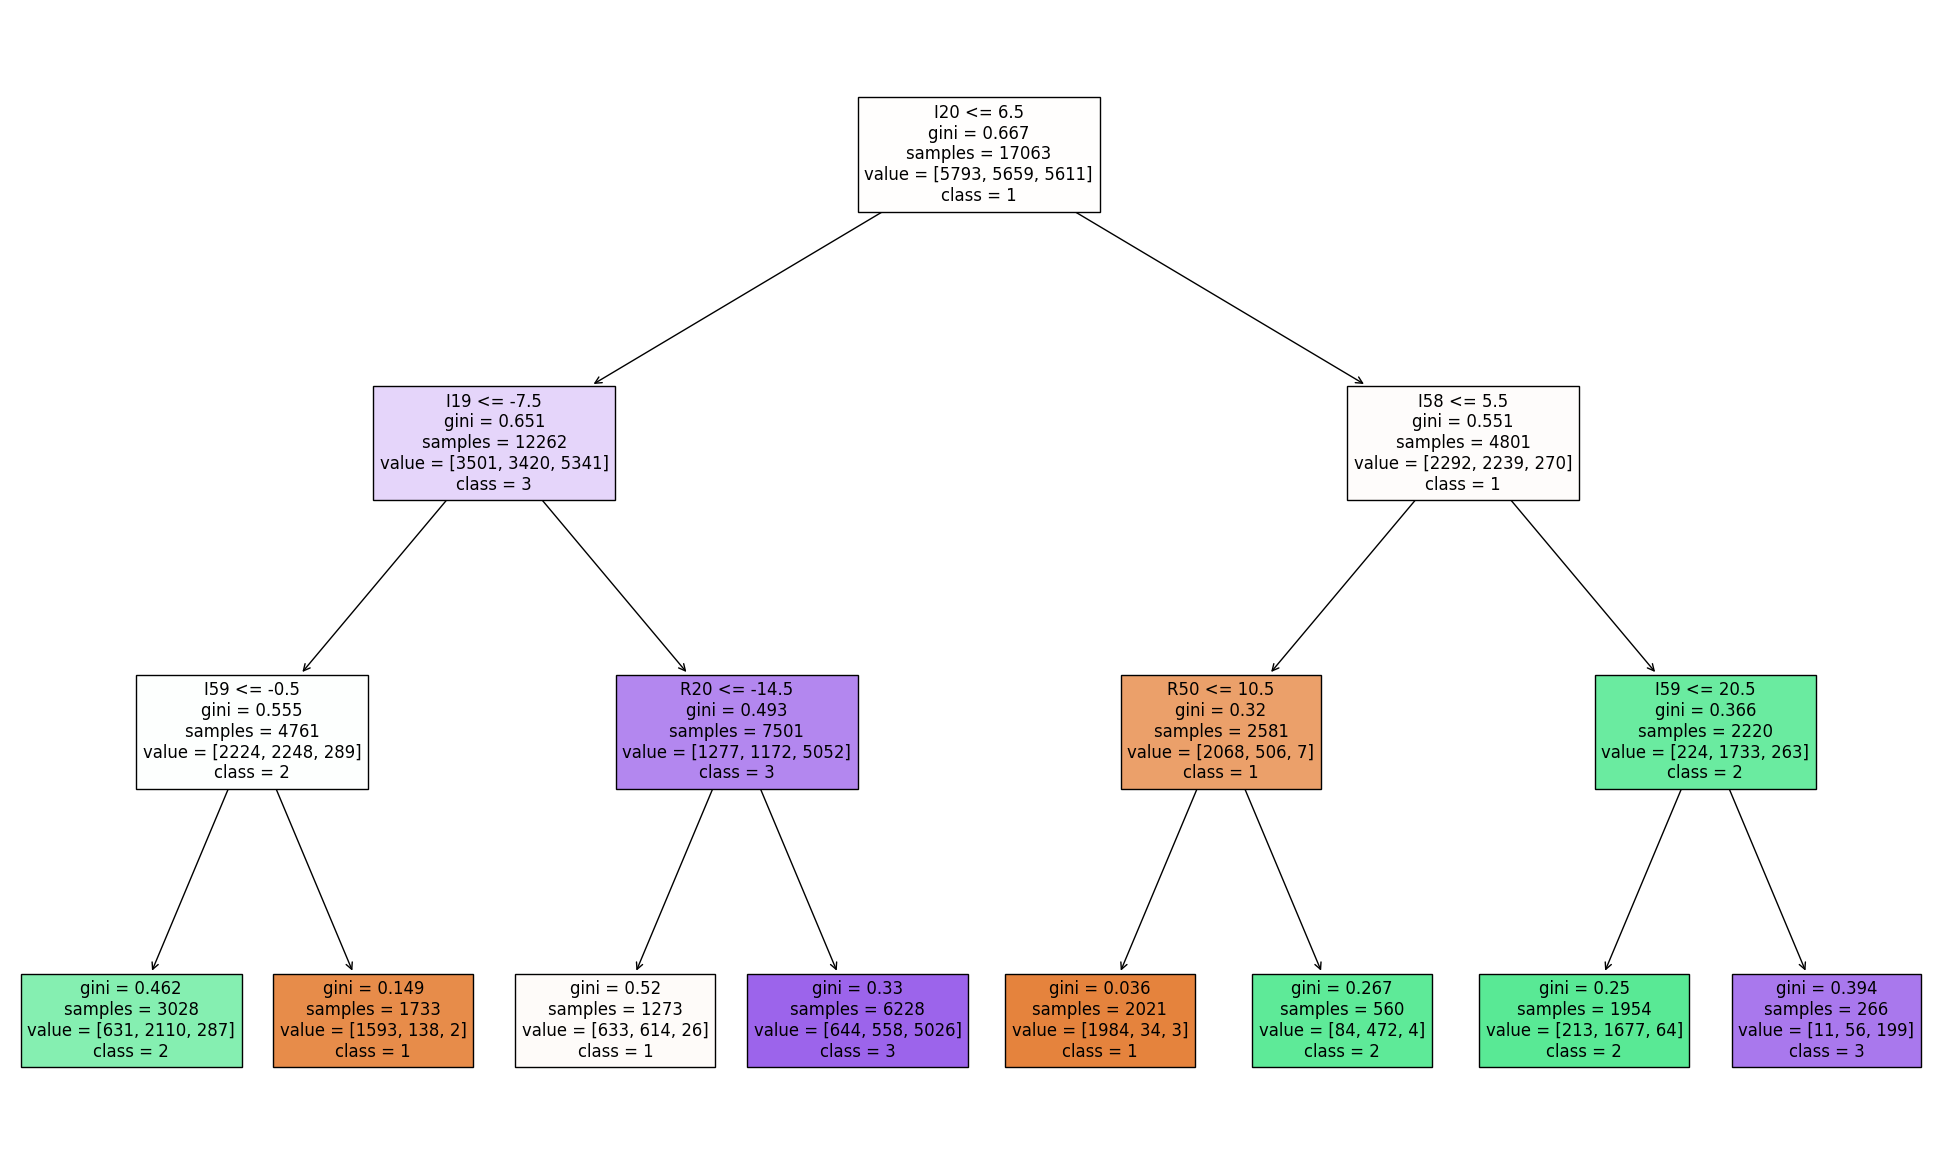

In [15]:
fig = plt.figure(figsize=(25,15))
_ = tree.plot_tree(model,feature_names= feature_cols,class_names=['1','2','3'],
                   filled=True)

In [16]:
from sklearn.tree import export_graphviz
from graphviz import Digraph, Source

def view_tree(model, feature_names, save_tree_img=False):
    estimators=model
    dot_graph=export_graphviz(estimators,
                feature_names = feature_names,
                class_names = ['1','2','3'],
                rounded = True, proportion = False,
                precision = 2, filled = True, special_characters=True
                             )
    g=Source(dot_graph)
    if save_tree_img:
        g.render(f'tree', format='png', view=False, cleanup=True)
    return g

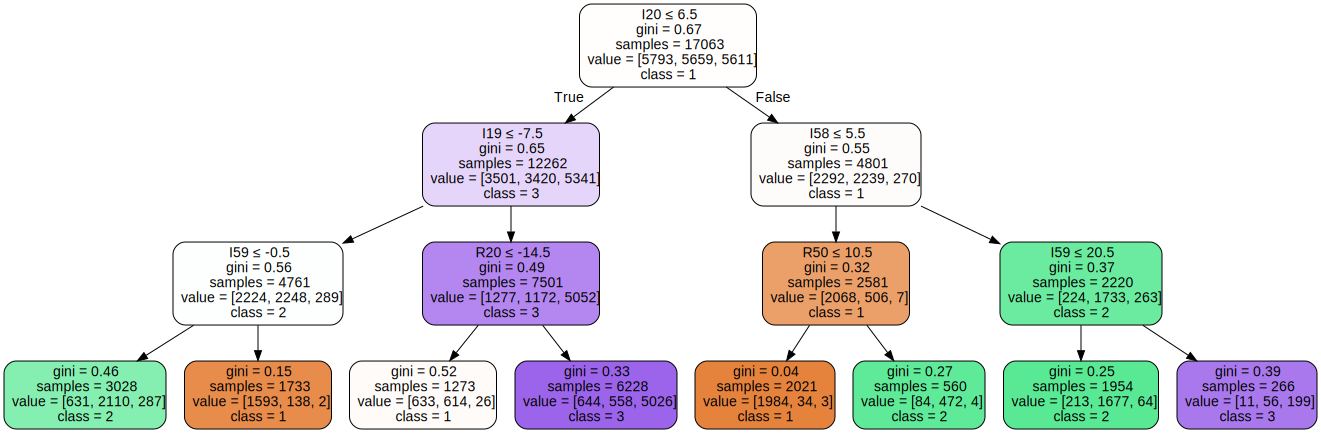

In [17]:
view_tree(model, feature_cols, False)

แสดงประสิทธิภาพของเเบบจำลอง

In [18]:
from sklearn import metrics
predicted = model.predict(X_test)
print(f'accuracy = {metrics.accuracy_score(y_test, predicted)}')

accuracy = 0.7803468208092486
